# BFS (largeur)

In [ ]:
def BFS(G,s):
    ''' En entrée : graphe G (liste adjacence), source s
        En sortie : ---
        Affiche   : sommets parcourus par l'algorithme'''
    
    N = len(G)
    vu = N*[0]
    a_parcourir = [s]
    vu[s] = 1
        
    while len(a_parcourir) != 0:   
        sommet = a_parcourir.pop(0)
        print(f"J'explore {sommet}, ses voisins sont {G[sommet]}")
        for u in G[sommet]:
            if vu[u]!=1:
                a_parcourir.append(u)
                print(f"\t Je rajoute {u} à la liste à parcourir")
                vu[u] = 1
            else :
                print(f"J'ai deja exploré {u}, ou j'ai prévu de le faire")
        print(f"=> Je dois encore parcourir {a_parcourir}")
        print()

In [ ]:
GG = {0:[1,2,3], 1:[0,4,5], 2:[0,3,6,7], 3:[0,2,7,8], 4:[1,9], 5:[1,10,11], 6:[2], 7:[2,3,12], 8:[3], 9:[4,11], 10:[5], 11:[9], 12:[7], 13:[8]}

# Depth First Search (DFS)

In [4]:
def DFS(G,s):
    """
    G -> graphe en dictionnaire de listes d'adjacence
    s -> source
    """
    # "Je me situe au sommet 's', je me déplace vers mon premier voisin non visité"
    print(s)     # je me situe au sommet s
    vu[s] = 1
    for v in G[s]:
        if not vu[v]:
            DFS(G,v)

In [5]:
GG = {0:[1,2,3], 1:[0,4,5], 2:[0,3,6,7], 3:[0,2,7,8], 4:[1,9], 5:[1,10,11], 6:[2], 7:[2,3,12], 8:[3], 9:[4,11], 10:[5], 11:[9], 12:[7], 13:[8]}

vu = [0 for s in GG]
DFS(GG,0)

0
1
4
9
11
5
10
2
3
7
12
8
6


### Graphe problématique "faux" DFS

In [ ]:
G = {0:[1,2], 1:[0,3], 2:[0,4,5], 3:[1,5], 4:[2], 5:[2,3]}

# deque

In [6]:
from collections import deque

In [10]:
 # append() pop() appenleft() popleft() sur liste VS deque

L = [1,2,3,4]
L.pop(-1)
L.append(3)
print(L)

[1, 2, 3, 3]


In [11]:
L.appendleft(3)

AttributeError: 'list' object has no attribute 'appendleft'

In [24]:
D = deque(L)
print(D)

deque([1, 2, 3, 3])


In [25]:
D.appendleft(0) 
print(D)

deque([0, 1, 2, 3, 3])


In [20]:
# BFS *optimal*

def BFS_deque(G,s):
    ''' En entrée : graphe G (liste adjacence), source s
        En sortie : ---
        Affiche   : sommets parcourus par l'algorithme'''
    
    N = len(G)
    vu = N*[0]
    a_parcourir = deque([s])
    vu[s] = 1
        
    while len(a_parcourir) != 0:   
        sommet = a_parcourir.popleft()
        for u in G[sommet]:
            if vu[u]!=1:
                a_parcourir.append(u)
                vu[u] = 1
            else :
        print()

In [ ]:
GG = {0:[1,2,3], 1:[0,4,5], 2:[0,3,6,7], 3:[0,2,7,8], 4:[1,9], 5:[1,10,11], 6:[2], 7:[2,3,12], 8:[3], 9:[4,11], 10:[5], 11:[9], 12:[7], 13:[8]}

s = 0
BFS(GG,s)
BFS_deque(GG,s)

# Plus court chemin

In [31]:
from collections import deque

def BFS_chemin(G,s):
    ''' En entrée : graphe G (liste adjacence), source s
        En sortie : ---
        Affiche   : sommets parcourus par l'algorithme'''
    
    N = len(G)
    vu = N*[0]
    a_parcourir = deque([s])
    vu[s] = 1

    chemin =[[] for i in range(N)]
    chemin[s] = [s]
        
    while len(a_parcourir) != 0:   
        sommet = a_parcourir.popleft()
        for u in G[sommet]:
            if vu[u]!=1:
                a_parcourir.append(u)
                vu[u] = 1
                print(f"Je sais quel est le plus court chemin pour aller vers {u}")
                print(f"\tIl faut passer par {sommet}")
                chemin[u] = chemin[sommet].copy()
                chemin[u].append(u)
            else :
                print()
    return chemin

Graphe G non dirigé

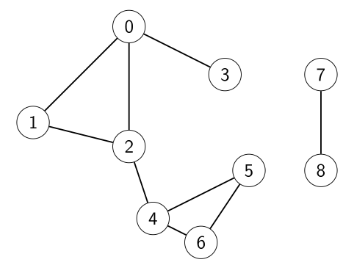

In [33]:
G = {0:[1,2,3], 1:[0,2], 2:[0, 1, 4], 3:[0], 4:[2, 5, 6], 5:[4,6], 6:[4,5], 7:[8], 8:[7]}

chemin = BFS_chemin(G,7)
print(chemin)


Je sais quel est le plus court chemin pour aller vers 8
	Il faut passer par 7

[[], [], [], [], [], [], [], [7], [7, 8]]


# Arbre couvrant

In [37]:
# BFS

from collections import deque

def BFS_arbre(G,s):
    ''' En entrée : graphe G (liste adjacence), source s
        En sortie : ---
        Affiche   : sommets parcourus par l'algorithme'''
    
    N = len(G)
    vu = N*[0]
    a_parcourir = deque([s])
    vu[s] = 1

    T = {u:[] for u in range(N)}
        
    while len(a_parcourir) != 0:   
        sommet = a_parcourir.popleft()
        for u in G[sommet]:
            if vu[u]!=1:
                a_parcourir.append(u)
                vu[u] = 1
                T[sommet].append(u)
                T[u].append(sommet)
    return T

In [ ]:
# DFS

In [35]:
GG = {0:[1,2,3], 1:[0,4,5], 2:[0,3,6,7], 3:[0,2,7,8], 4:[1,9], 5:[1,10,11], 6:[2], 7:[2,3,12], 8:[3], 9:[4,11], 10:[5], 11:[9], 12:[7], 13:[8]}

In [39]:
T_bfs = BFS_arbre(GG,0)
print(T_bfs)

{0: [1, 2, 3], 1: [0, 4, 5], 2: [0, 6, 7], 3: [0, 8], 4: [1, 9], 5: [1, 10, 11], 6: [2], 7: [2, 12], 8: [3], 9: [4], 10: [5], 11: [5], 12: [7], 13: []}


In [45]:
def DFS_arbre(G,s):
    """
    G -> graphe en dictionnaire de listes d'adjacence
    s -> source
    """
    # "Je me situe au sommet 's', je me déplace vers mon premier voisin non visité"
    print(s)     # je me situe au sommet s
    vu[s] = 1
    T[s] = [s]
    for v in G[s]:
        if not vu[v]:
            T[s].append(v)
            T[v].append(s)
            DFS(G,v)

In [46]:
vu = [0 for u in GG]
T = {u:[] for u in GG}
DFS_arbre(GG,0)
print(T)

0
1
4
9
11
5
10
2
3
7
12
8
6
{0: [0, 1, 2], 1: [0], 2: [0], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: []}
